In [1]:
import pandas as pd
import numpy as np
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import ExhaustiveSearch
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import K2Score
from pgmpy.models import BayesianModel
import warnings
warnings.filterwarnings('ignore')
import networkx as nx
import pylab as plt
import matplotlib.pyplot
def drawModel(model):
    nx.draw(model, with_labels=True)

In [2]:
def zeroneloss(y_test, y_pred):
    
    y_pred=np.asarray(y_pred)
    y_test=np.asarray(y_test)
    it=np.nditer(y_pred)
    it1=np.nditer(y_test)
    trues=[]
    falses=[]
    count=0

    while not it.finished:
        if(it[0]==it1[0]):
            trues.append(1)
        it.iternext()
        it1.iternext()

    while not it.finished:
        if(it[0]!=it1[0]):
            falses.append(0)
        it.iternext()
        it1.iternext()

    count=np.count_nonzero(trues)+np.count_nonzero(falses==0)
   
    
    return (count/len(y_test))*100

In [3]:
dataset= pd.read_csv("15features.csv")

In [4]:
df1=dataset.iloc[:,0]

In [5]:
dataset1=pd.read_csv("dataset_seen_training_siamese.csv")
dataset2=pd.read_csv("dataset_unseen_training_siamese.csv")
dataset3= pd.read_csv("dataset_seen_validation_siamese.csv")
dataset4=pd.read_csv("unseen-dataset/dataset_seen_validation_siamese.csv")
dataset5=pd.read_csv("shuffled-dataset/dataset_seen_validation_siamese.csv")

In [6]:
df3=pd.merge(dataset,dataset1, left_on=['imagename'], right_on=['left'])

In [7]:
df4=pd.merge(dataset, df3 , left_on=['imagename'], right_on=['right'])

In [8]:
df5=pd.merge(dataset,dataset4, left_on=['imagename'], right_on=['left'])
df5_val=pd.merge(dataset, df5 , left_on=['imagename'], right_on=['right'])
df5_val=df5_val.drop(['Unnamed: 0', 'imagename_x', 'imagename_y'], axis=1)
cols1= list(df5_val)
cols1.insert(0, cols1.pop(cols1.index('right')))
cols1.insert(0, cols1.pop(cols1.index('left')))
df5_val = df5_val.loc[:, cols1]

In [9]:
df4=df4.drop(['Unnamed: 0', 'imagename_x'], axis=1)

In [10]:
cols= list(df4)
cols.insert(0, cols.pop(cols.index('right')))
cols.insert(0, cols.pop(cols.index('left')))
df4 = df4.loc[:, cols]

In [11]:
df4=df4.drop(['imagename_y'], axis=1)

In [12]:
k2score=K2Score(dataset.iloc[:,1:16])
f=HillClimbSearch(dataset.iloc[:,1:16], scoring_method=k2score)

[('size', 'slantness'), ('size', 'pen_pressure'), ('size', 'letter_spacing'), ('dimension', 'size'), ('is_continuous', 'exit_stroke_d'), ('is_continuous', 'formation_n'), ('is_continuous', 'entry_stroke_a'), ('slantness', 'tilt'), ('staff_of_a', 'is_lowercase'), ('formation_n', 'constancy'), ('staff_of_d', 'is_continuous'), ('word_formation', 'dimension'), ('constancy', 'word_formation'), ('constancy', 'staff_of_a')]


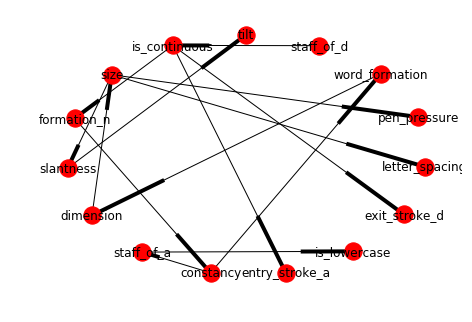

In [13]:
est=f.estimate(max_indegree=1)
edges1=est.edges()
print(edges1)

bestModel = BayesianModel([('size', 'slantness'), ('size', 'pen_pressure'), ('size', 'letter_spacing'), ('dimension', 'size'), ('is_continuous', 'exit_stroke_d'), ('is_continuous', 'formation_n'), ('is_continuous', 'entry_stroke_a'), ('slantness', 'tilt'), ('staff_of_a', 'is_lowercase'), ('formation_n', 'constancy'), ('staff_of_d', 'is_continuous'), ('word_formation', 'dimension'), ('constancy', 'word_formation'), ('constancy', 'staff_of_a')])
drawModel(bestModel)
plt.show()

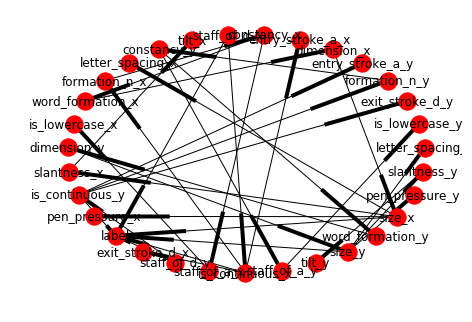

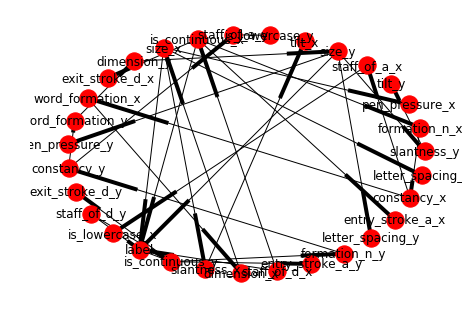

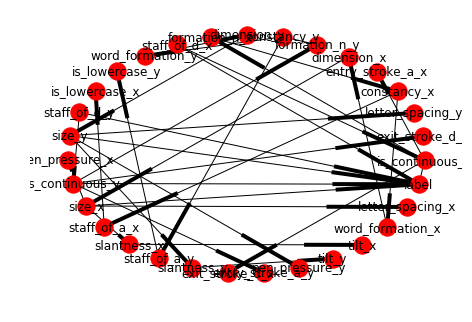

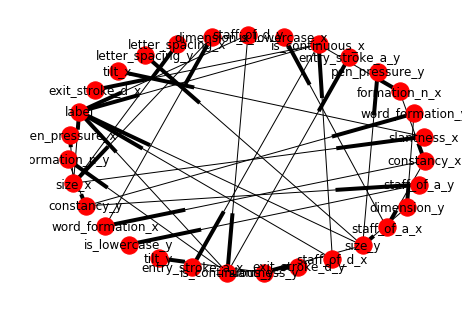

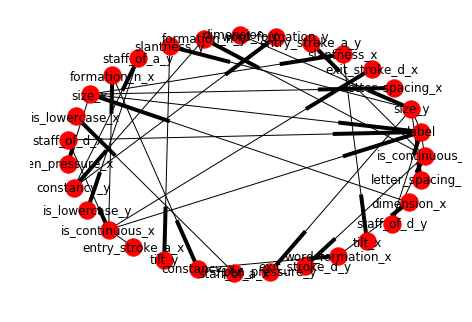

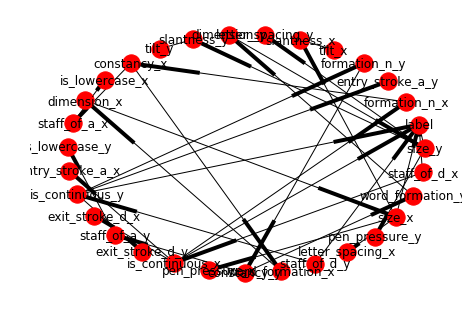

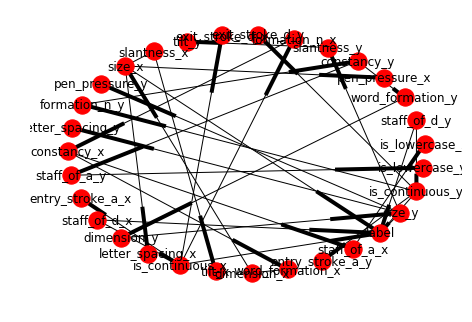

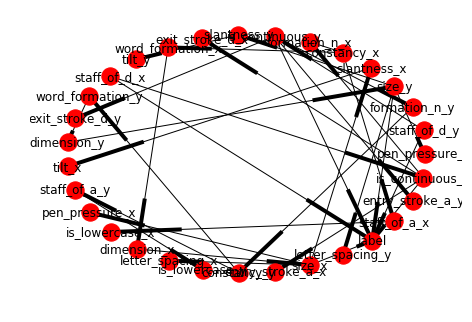

2.21 s ± 97.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%%timeit
modelx=BayesianModel([('size_x', 'slantness_x'), ('size_x', 'pen_pressure_x'), ('size_x', 'letter_spacing_x'),
                      ('dimension_x', 'size_x'), ('is_continuous_x', 'exit_stroke_d_x'), 
                      ('is_continuous_x', 'formation_n_x'), ('is_continuous_x', 'entry_stroke_a_x'),
                      ('slantness_x', 'tilt_x'), ('staff_of_a_x', 'is_lowercase_x'), 
                      ('formation_n_x', 'constancy_x'), ('staff_of_d_x', 'is_continuous_x'),
                      ('word_formation_x', 'dimension_x'), ('constancy_x', 'word_formation_x'),
                      ('constancy_x', 'staff_of_a_x'),
                       ('size_x', 'label'), ('is_continuous_x', 'label'), ('staff_of_d_x', 'label'),
                      ('size_y', 'slantness_y'), ('size_y', 'pen_pressure_y'), ('size_y', 'letter_spacing_y'),
                      ('dimension_y', 'size_y'), ('is_continuous_y', 'exit_stroke_d_y'), 
                      ('is_continuous_y', 'formation_n_y'), ('is_continuous_y', 'entry_stroke_a_y'),
                      ('slantness_y', 'tilt_y'), ('staff_of_a_y', 'is_lowercase_y'), 
                      ('formation_n_y', 'constancy_y'), ('staff_of_d_y', 'is_continuous_y'),
                      ('word_formation_y', 'dimension_y'), ('constancy_y', 'word_formation_y'),
                      ('constancy_y', 'staff_of_a_y'), ('size_y', 'label'),  ('is_continuous_y', 'label'),
                     ('staff_of_d_y', 'label')
                     ])

#est.moralize()
modelx.fit(df4.iloc[:,2:33])

drawModel(modelx)
plt.show()

In [15]:
# plt.hold(True)
#matplotlib.pyplot.hold(True)



In [16]:
df5_val.iloc[:,2:32]=df5_val.iloc[:,2:32]-1

In [17]:
from pgmpy.inference import VariableElimination
inference=VariableElimination(modelx)


NameError: name 'modelx' is not defined

In [ ]:
variablesx=list(df4.iloc[:,2:17].columns)
variablesy=list(df4.iloc[:,17:32].columns)

evidence1=df5_val.iloc[:,2:17]
evidence2=df5_val.iloc[:,17:32]

evidencex=evidence1.to_dict(orient='records')
evidencey=evidence2.to_dict(orient='records')

print(variablesy)
print(variablesx)


In [ ]:
%%timeit
y_pred1=[]
for i in range(0,len(evidence1)):
    cpdl0=[]
    cpdl1=[]

    evidencea=evidencex[i].copy()
    evidenceb=evidencey[i].copy()
    evidencea['label']=0
    evidenceb['label']=1
    cpd0=inference.query(variables=variablesx, evidence=evidenceb)
    cpd1=inference.query(variables=variablesy, evidence=evidencea)
    
    for k in range(0,len(variablesx)):
        cpdl0.append(cpd0[variablesx[k]].values)
        cpdl1.append(cpd1[variablesy[k]].values)
        
    p0=1
    p1=1


    for x in range(0,len(variablesy)):
        p0=p0*cpdl0[x][evidencea[variablesx[x]]]
        p1=p1*cpdl1[x][evidenceb[variablesy[x]]]
        
    likelihood=p0/p1
    
    if(likelihood>1):
        y_pred1.append(1)
    else:
        y_pred1.append(0)
        
        
        
#     cpdl0prod=np.product(cpdl0)
#     cpdl1prod=np.product(cpdl1)
    
    #[0][features for features in variablesx].values)
   # print(cpdl1[0][variablesy[i]].values)010
            

In [ ]:
y_pred1=np.asarray(y_pred1)

In [ ]:
#len(y_test)
y_test=df5_val.iloc[:,32:]
y_test=np.asarray(y_test)
len(df5_val.iloc[:,2:17])

In [ ]:
print('Accuracy:', zeroneloss(y_pred1,y_test))